# Predict Pokemon battles using Machine Learning

Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


Import Datasets

In [7]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")
tests_df = pd.read_csv("tests.csv")
combined_df = pokemon_df

In [8]:
pokemon_df.shape

(800, 12)

In [9]:
combats_df.shape

(50000, 3)

# 1. __`pokemon_df`__

In [10]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#### Print shape of pokemon_df

In [11]:
pokemon_df.shape

(800, 12)

In [12]:
from PIL import Image
im = Image.open("pokemon_montage.png")

pokemon_images = []
y = 0
x = 0
i = 0
for k in range(835):
    i = k % 40
    if (k % 40 == 0):
        y += 126.75
    x = i*126
    crop_rectangle = (x, y-126.75, x+126, y)
    cropped_im = im.crop(crop_rectangle)
    pokemon_images.append(cropped_im)

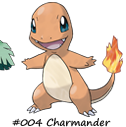

In [13]:
pokemon_images[4]

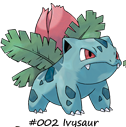

In [14]:
pokemon_images[1]

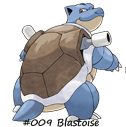

In [15]:
pokemon_images[11]

#### Print shape of combats_df

In [16]:
combats_df.shape

(50000, 3)

# 2. GRAPHS

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


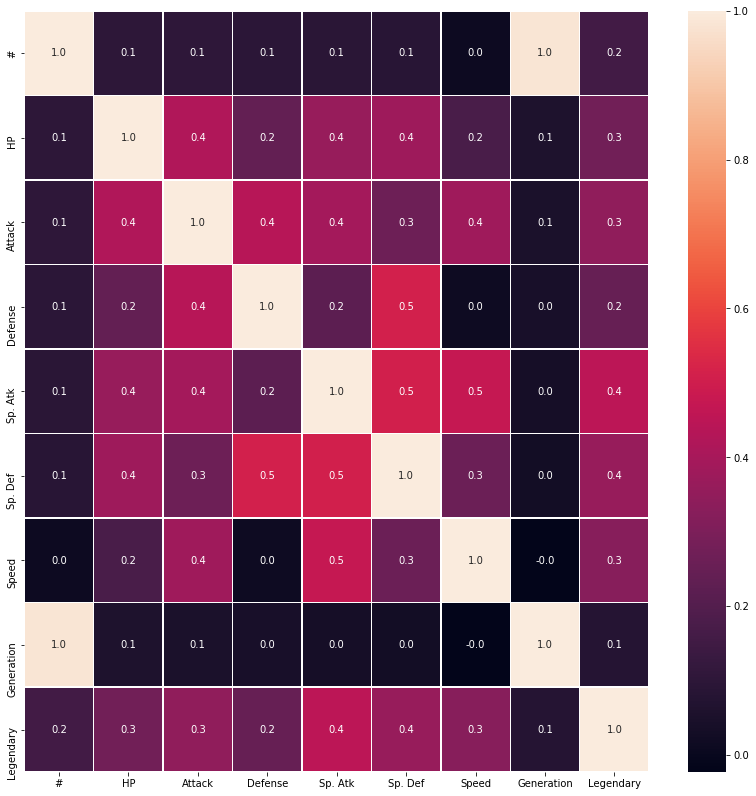

In [18]:
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(combined_df.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

plt.show()

In [19]:
combined_df.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [20]:
fig_size = plt.rcParams['figure.figsize']
print(fig_size)
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams['figure.figsize'] = fig_size

[6.0, 4.0]


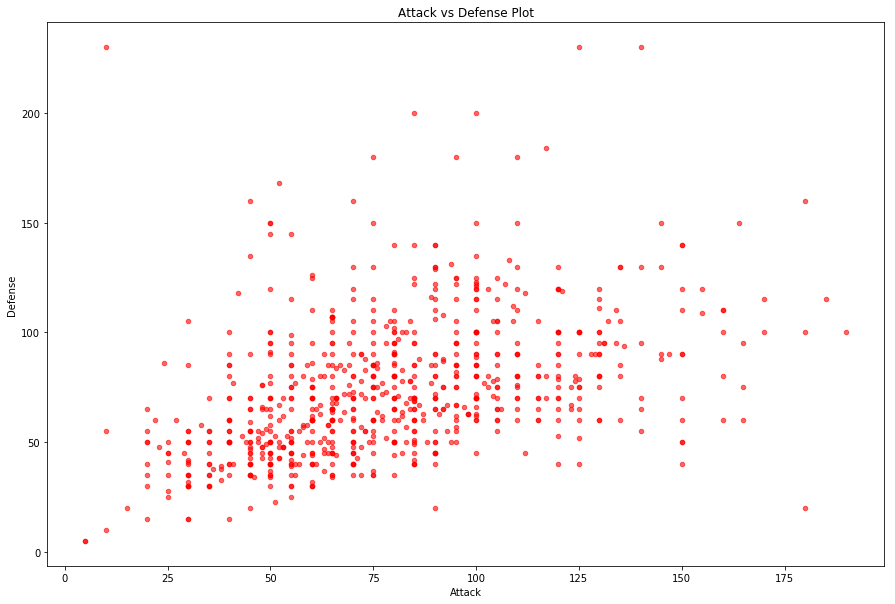

In [95]:
combined_df.plot(kind='scatter', x='Attack', y='Defense', alpha=.6, color='red')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs Defense Plot')
plt.show()

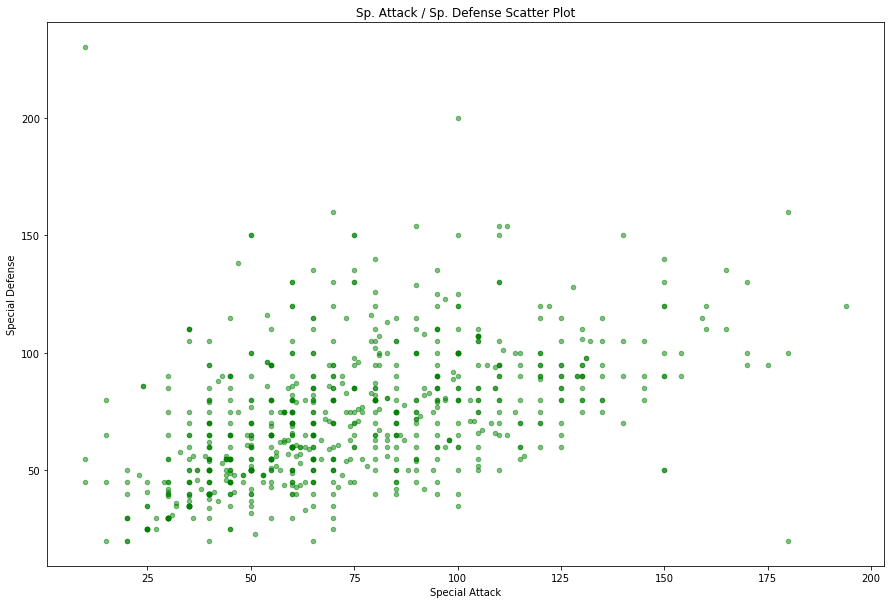

In [96]:
combined_df.plot(kind='scatter', x='Sp. Atk', y='Sp. Def', alpha=.5, color='green')
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')
plt.title('Sp. Attack / Sp. Defense Scatter Plot')

plt.show()

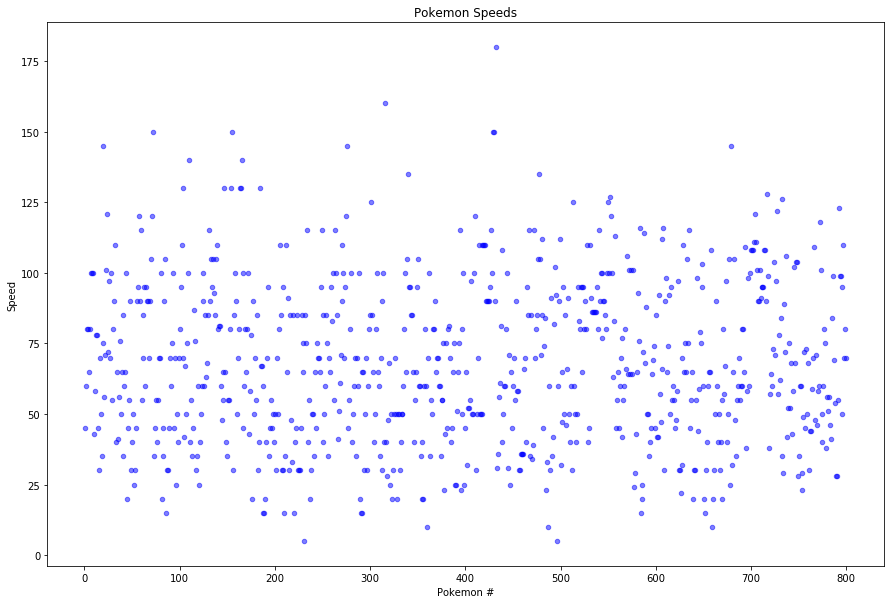

In [97]:
combined_df.plot(kind='scatter', x='#', y='Speed', alpha=.5, color='blue')
plt.xlabel('Pokemon #')
plt.ylabel('Speed')

plt.title('Pokemon Speeds')

plt.show()

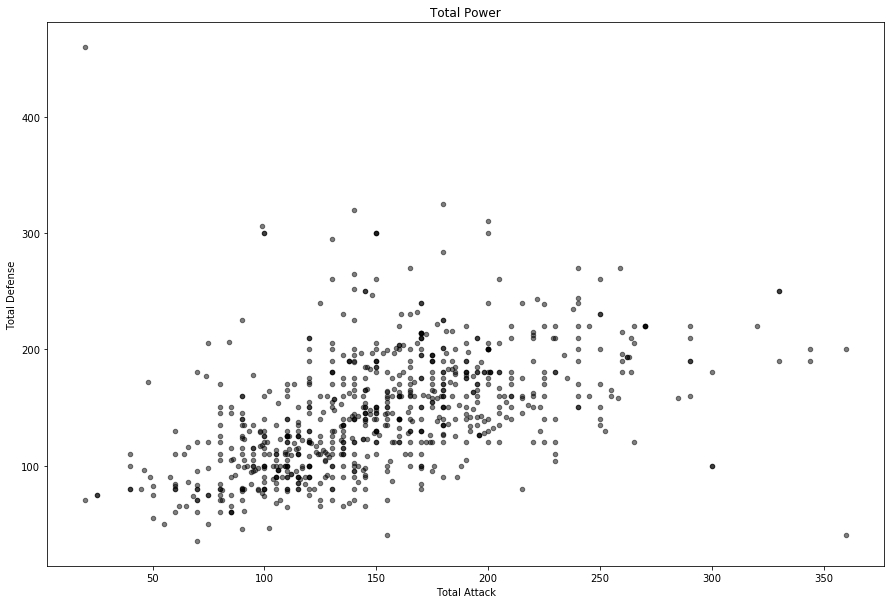

In [98]:
total_attack = combined_df['Attack'] + combined_df['Sp. Atk']
total_defense = combined_df['Defense'] + combined_df['Sp. Def']


stat_df = pd.concat([total_attack, total_defense], axis=1)

stat_df.plot(kind='scatter', x=0, y=1, alpha=.5, color='black')
plt.xlabel('Total Attack')
plt.ylabel('Total Defense')

plt.title('Total Power')

plt.show()

# 3. `combats_df`
---

In [103]:
combats_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [104]:
combats_df['First_pokemon'].head()

0    266
1    702
2    191
3    237
4    151
Name: First_pokemon, dtype: int64

In [105]:
combats_df['First_pokemon'][0]

266

In [106]:
combined_df[combined_df['#'] == 1]['Name']


0    Bulbasaur
Name: Name, dtype: object

In [21]:
combined_df[combined_df['#'] == combats_df['First_pokemon'][0]]['Name']

265    Larvitar
Name: Name, dtype: object

In [22]:
print(combats_df['First_pokemon'].head())
print(combats_df['Second_pokemon'].head())
print(combats_df['Winner'].head())
lost_to_df = lambda x: combats[ (combats["First_pokemon"] == x) & (combats["Winner"] != x) ]
win_to_df = lambda x: combats[ (combats["First_pokemon"] == x) & (combats["Winner"] == x) ]
print(lost_to_df)
print(win_to_df)

0    266
1    702
2    191
3    237
4    151
Name: First_pokemon, dtype: int64
0    298
1    701
2    668
3    683
4    231
Name: Second_pokemon, dtype: int64
0    298
1    701
2    668
3    683
4    151
Name: Winner, dtype: int64
<function <lambda> at 0x114b80ea0>
<function <lambda> at 0x114b80f28>


In [23]:
features = ['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
combined_df = combined_df[features]
combined_df.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Grass,Poison,45,49,49,65,65,45
1,2,Grass,Poison,60,62,63,80,80,60
2,3,Grass,Poison,80,82,83,100,100,80
3,4,Grass,Poison,80,100,123,122,120,80
4,5,Fire,NaN,39,52,43,60,50,65


In [24]:
combats_df = combats_df.rename(index= str, columns= {'First_pokemon': '#', 'Second_pokemon': 'Fought'})
combats_df.head()
print(type(combats_df['#'][0]))

<class 'numpy.int64'>


In [25]:
combined_df = pd.merge(combined_df[features], combats_df, on = '#', how = 'left')
print(combined_df.shape)

combined_df = combined_df.where((pd.notnull(combined_df)), -1)
fought_to_int = combined_df['Fought'].map(lambda x: np.int64(x))
winner_to_int = combined_df['Winner'].map(lambda x: np.int64(x))
type_to_none = combined_df['Type 2'].map(lambda x: None if x == -1 else x)


#print(combined_df.head())
combined_df['Fought'] = fought_to_int
combined_df['Winner'] = winner_to_int
combined_df['Type 2'] = type_to_none

print(combined_df.shape)
combined_df.head()

(50016, 11)
(50016, 11)


,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Fought,Winner
0,1,Grass,Poison,45,49,49,65,65,45,679,679
1,1,Grass,Poison,45,49,49,65,65,45,687,687
2,1,Grass,Poison,45,49,49,65,65,45,557,557
3,1,Grass,Poison,45,49,49,65,65,45,766,766
4,1,Grass,Poison,45,49,49,65,65,45,153,153


In [26]:
combined_df.isnull().sum()

#              0
Type 1         0
Type 2     24039
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Fought         0
Winner         0
dtype: int64

In [27]:
final_features = ['#', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Fought']
y = combined_df['Winner']
x = combined_df[final_features]


print(x.shape)
print(y.head())


(50016, 10)
0    679
1    687
2    557
3    766
4    153
Name: Winner, dtype: int64


### OHE

In [28]:
x_ohe = pd.get_dummies(x, columns = ['#', 'Type 1', 'Type 2', 'Fought'])
print(x_ohe.head())
x_ohe.shape

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  #_1  #_2  #_3  #_4  \
0  45      49       49       65       65     45    1    0    0    0   
1  45      49       49       65       65     45    1    0    0    0   
2  45      49       49       65       65     45    1    0    0    0   
3  45      49       49       65       65     45    1    0    0    0   
4  45      49       49       65       65     45    1    0    0    0   

      ...      Fought_791  Fought_792  Fought_793  Fought_794  Fought_795  \
0     ...               0           0           0           0           0   
1     ...               0           0           0           0           0   
2     ...               0           0           0           0           0   
3     ...               0           0           0           0           0   
4     ...               0           0           0           0           0   

   Fought_796  Fought_797  Fought_798  Fought_799  Fought_800  
0           0           0           0         

(50016, 1627)

# 4. CLASSIFIERS

In [29]:
x_ohe_train, x_ohe_test, y_train, y_test = train_test_split(x_ohe, y, test_size = 0.33)


In [121]:
knn = KNeighborsClassifier(n_jobs = -1)

knn.fit(x_ohe_train, y_train)
y_predict = knn.predict(x_ohe_test)
accuracy = accuracy_score(y_test, y_predict)
print("Knn: ", accuracy)


Knn:  0.409548043136


In [122]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_ohe_train,y_train)
y_predict = decisiontree.predict(x_ohe_test)
accuracy = accuracy_score(y_test, y_predict)
print("Decision Tree: ", accuracy)

Decision Tree:  0.785653701684


In [123]:
random_forest = RandomForestClassifier(n_jobs = -1)
random_forest.fit(x_ohe_train, y_train)
y_predict = random_forest.predict(x_ohe_test)
accuracy = accuracy_score(y_test, y_predict)
print("Random Forest: ", accuracy)

Random Forest:  0.836362534836


In [128]:
logreg = LogisticRegression()
logreg.fit(x_ohe_train,y_train)
y_predict = logreg.predict(x_ohe_test)
accuracy = accuracy_score(y_test, y_predict)
print("Log Reg: ", accuracy)


Log Reg:  0.813037683267


In [31]:
naive = GaussianNB()
naive.fit(x_ohe_train, y_train)
acc_test_gaussiannb = naive.score(x_ohe_test, y_test)
print(acc_test_gaussiannb)


0.0696716345571


In [32]:
acc_train_gaussiannb = naive.score(x_ohe_train, y_train)
print(acc_train_gaussiannb)

0.938645180543


In [127]:
from sklearn.ensemble import BaggingClassifier

bag_class = BaggingClassifier()
bag_class.fit(x_ohe_train, y_train)
y_predict_bag = bag_class.predict(x_ohe_test)

bag_class_accuracy = accuracy_score(y_test, y_predict_bag)
print("Bagging Classifier: ", bag_class_accuracy)

Bagging Classifier:  0.843874954562


# 5. More Preprocessing
---

### Functions

In [10]:
# split up columns so it's easier to iterate over..
first_matches_won_df = lambda x: combats_df[ (combats_df["First_pokemon"] == x) & (combats_df["Winner"] == x) ]
second_matches_won_df = lambda x: combats_df[ (combats_df["Second_pokemon"] == x) & (combats_df["Winner"] == x) ]

### Mark where pokemon 1 won against pokemon 2

In [11]:
create_range = range(1, 800 + 1) # from 1 to 800

num_T = pd.DataFrame(0, index=create_range, columns=create_range) # 800 x 800 - values should be all zeros

print(num_T.shape)
print(type(num_T) )

(800, 800)
<class 'pandas.core.frame.DataFrame'>


### This loops through 2 sets of dataframes where pokemon i has won

In [14]:
pvp_wins = num_T.copy()

for i in range(1, 801):
    for j in first_matches_won_df(i)["Second_pokemon"]: # Second_pokemon column: j is the loser to i
        pvp_wins.loc[i][j] += 1
    for k in second_matches_won_df(i)["First_pokemon"]: # First_pokemon column: k is the loser to i
        pvp_wins.loc[i][k] += 1

In [15]:
pvp_wins.head()

,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
